# Deep learning from scratch: homework 1

# Xiao Zidong.        

# NetID: ZXR5777

#### <span style="color:#a50e3e;">Exercise 1. </span> Python class refresher

Roll up the Python functions provided for you in the previous example to make a Python class for computing and viewing single input derivatives called ``GradViewer``.  Instances should be initialized with the input function to differentiate, and the gradient function can be computed on initialization as well.

When complete you should be able to successfully run the cell below.

In [1]:
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import grad
import math

In [2]:

def my_function(w):
    y = np.sin(w**3)
    return y
def g(w):
    sum=0
    for n in range(11):
        sum=sum+np.cos(w*n)
    return sum

In [3]:
class Gradview:

    def __init__(self,func):
        self.func=func
    def plot_it(self):
        nabla_my_function = grad(self.func)

        # create space over which to evaluate function and gradient
        w_vals = np.linspace(-5, 5, 200)

        # evaluate gradient over input range
        my_function_vals = [self.func(v) for v in w_vals]

        grad_vals = [nabla_my_function(v) for v in w_vals]

        # create figure
        fig, ax = plt.subplots(1, 1, figsize=(6, 3))

        # plot function and gradient values
        ax.plot(w_vals, my_function_vals)
        ax.plot(w_vals, grad_vals)
        ax.legend(['func', 'derivative'], loc='center left', bbox_to_anchor=(1, 0.5))
        plt.show()

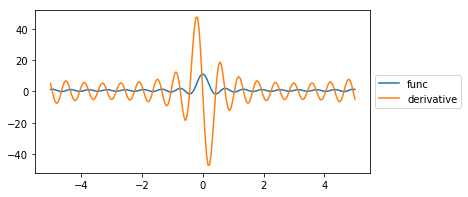

In [4]:
text=Gradview(g)
text.plot_it()

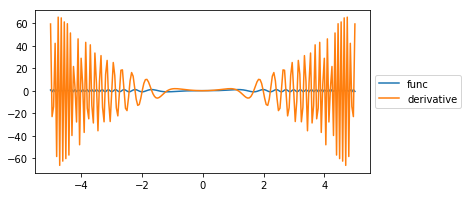

In [5]:
text=Gradview(my_function)
text.plot_it()

#### <span style="color:#a50e3e;">Exercise 2. </span> Python class refresher part 2

Extend the class you put together in exercise 1 into a new class called ``OrderViewer`` that can compute a higher order derivative of any desired order of an input function, and plots both.  Make a new function for this class ``compute_it`` that takes in the desired ``order`` and computes this order derivative.

When complete you should be able to successfully run the cell below.

In [6]:
class OverViewer:


    w_vals=0
    grad_vals=0
    my_function_vals=0
    def __init__(self,func):
        self.func=func

    def compute_it(self,order):
        nabla_my_function=self.func
        for i in range(order):
          nabla_my_function = grad(nabla_my_function)




        # create space over which to evaluate function and gradient
        self.w_vals = np.linspace(-5, 5, 200)

        # evaluate gradient over input range
        self.my_function_vals = [self.func(v) for v in self.w_vals]

        self.grad_vals = [nabla_my_function(v) for v in self.w_vals]


    def plot_it(self):


        # create figure
        fig, ax = plt.subplots(1, 1, figsize=(6, 3))

        # plot function and gradient values
        ax.plot(self.w_vals, self.my_function_vals)
        ax.plot(self.w_vals, self.grad_vals)
        ax.legend(['func', 'derivative'], loc='center left', bbox_to_anchor=(1, 0.5))
        plt.show()


In [7]:
def my_function1(w):
    y = w**2
    return y

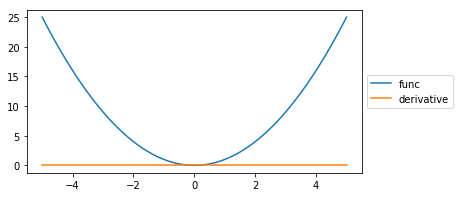

In [8]:
text=OverViewer(my_function1)
text.compute_it(3)
text.plot_it()

#### <span style="color:#a50e3e;">Exercise 3. </span>  A generic gradient descent function

Adjust the gradient descent code below we saw in class to record the weights at each step of algorithm (instead of the best weights) and return the entire weight history.  Remember here the inputs are 

- g: the input function to perform gradient descent on
- alpha: the steplength parameter
- max_its: the number of gradient descent steps to take
- w: the initial point

Your version of the ``gradient_descent`` below should return a history of weights recorded at each step called ``weight_history``. 

In [9]:
def gradient_descent(g, alpha, max_its, w):
    # compute the gradient of our input function - note this is a function too!
    gradient = grad(g)

    # run the gradient descent loop
    best_w = w  # weight we return, should be the one providing lowest evaluation
    best_eval = g(w)  # lowest evaluation yet
    w_history=[w]

    j=0
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha * grad_eval

        # return only the weight providing the lowest evaluation
        test_eval = g(w)
        if test_eval < best_eval:
            best_eval = test_eval
            w_history.append(w)




    return w_history

In [10]:

# create the input function
g = lambda w: 1/float(50)*(w**4 + w**2 + 10*w)   # try other functions too!  Like g = lambda w: np.cos(2*w) , g = lambda w: np.sin(5*w) + 0.1*w**2, g = lambda w: np.cos(5*w)*np.sin(w)

# run gradient descent
weight_history = gradient_descent(g = g,alpha = 10**-2,max_its = 2000,w = 2.0)

In [11]:
def cost_history(weight_history, g):
    # loop over weight history and compute associated cost function history at each step
    w_vals = np.linspace(0, 2000, len(weight_history))

    cost_function=[0]
    cost_function[0]=g(weight_history[0])
    for k in range (1,len(weight_history)):
        cost_function.append(g(weight_history[k]))

   
    fig, ax = plt.subplots(1, 1, figsize=(6, 3))

    # plot function and gradient values
    ax.plot(w_vals, cost_function)

    ax.legend(['func', 'derivative'], loc='center left', bbox_to_anchor=(1, 0.5))
    # plot cost function history
  
    plt.show()


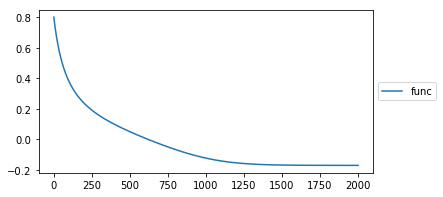

In [12]:
cost_history(weight_history,g)

#### <span style="color:#a50e3e;">Exercise 4. </span>  Apply gradient descent to minimize the Least Squares cost for linear regression on a low dimensional dataset

In [13]:
csvname = '/Users/tomx/Library/Mobile Documents/com~apple~CloudDocs/Study/Deep learning 495/deep_hw_1/2d_linregress_data.csv'
data = np.loadtxt(csvname, delimiter=',')

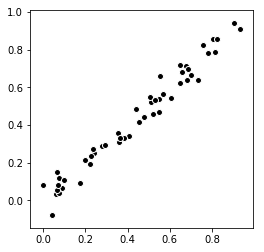

In [14]:
# scatter plot the input data
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.scatter(data[:,0],data[:,1],color = 'k',edgecolor = 'w')
plt.show()

In [15]:
# form the input/output data vectors
x = data[:,-1]
y = data[:,-1]

# least squares cost function for linear regression
def least_squares(w):
    cost = 0
    for p in range(len(y)):
        # get pth input/output pair
        x_p = x[p]
        y_p = y[p]
        
        # form linear combination
        c_p = w[0] + w[1]*x_p
        
        # add least squares for this datapoint
        cost += (c_p - y_p)**2
        
    return cost

In [16]:
# run gradient descent
w = np.asarray([1.5,1.5])
g=least_squares

# When alpha = 0.00001

In [17]:
weight_history = gradient_descent(g = least_squares,alpha = 0.00001,max_its = 500,w = np.asarray([1.5,1.5]))

In [18]:
def MSE(weight_history, g, max_its):
    # loop over weight history and compute the MSE at each step o gradient descent

    m=[0]
    m[0]=g(weight_history[0])/len(x)
    for k in range(1,len(weight_history)):
        m.append(g(weight_history[k])/len(x))

    w_vals = np.linspace(0, max_its, len(weight_history))

    fig, ax = plt.subplots(1, 1, figsize=(6, 3))

    # plot function and gradient values
    ax.plot(w_vals, m)

    ax.legend(['func'], loc='center left', bbox_to_anchor=(1, 0.5))

    plt.show()


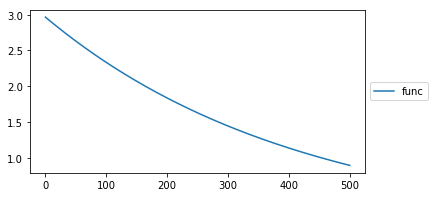

In [19]:
MSE(weight_history,g,500)

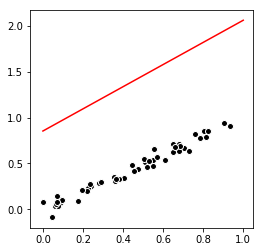

In [20]:
# our initial weights
w = weight_history[-1]

# scatter plot the input data
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.scatter(data[:,0],data[:,1],color = 'k',edgecolor = 'w')

# fit a trend line
x_vals = np.linspace(0,1,200)
y_vals = w[0] + w[1]*x_vals
ax.plot(x_vals,y_vals,color = 'r')
plt.show()

# When alpha = 0.0001

In [21]:
weight_history = gradient_descent(g = least_squares,alpha = 0.0001,max_its = 500,w = np.asarray([1.5,1.5]))

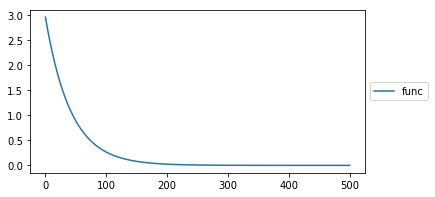

In [22]:
MSE(weight_history,g,500)

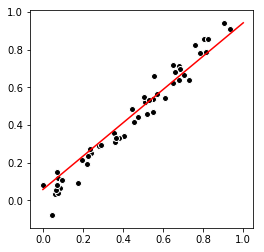

In [23]:
# our initial weights
w = weight_history[-1]

# scatter plot the input data
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.scatter(data[:,0],data[:,1],color = 'k',edgecolor = 'w')

# fit a trend line
x_vals = np.linspace(0,1,200)
y_vals = w[0] + w[1]*x_vals
ax.plot(x_vals,y_vals,color = 'r')
plt.show()

# When alpha = 0.001

In [24]:
weight_history = gradient_descent(g = least_squares,alpha = 0.001,max_its = 500,w = np.asarray([1.5,1.5]))

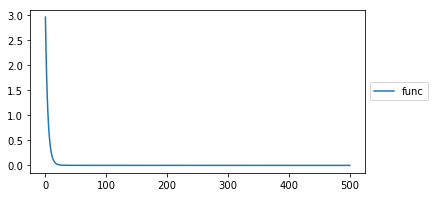

In [25]:
MSE(weight_history,g,500)

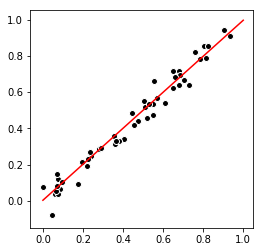

In [26]:
# our initial weights
w = weight_history[-1]

# scatter plot the input data
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.scatter(data[:,0],data[:,1],color = 'k',edgecolor = 'w')

# fit a trend line
x_vals = np.linspace(0,1,200)
y_vals = w[0] + w[1]*x_vals
ax.plot(x_vals,y_vals,color = 'r')
plt.show()

#### <span style="color:#a50e3e;">Exercise 5. </span> Use linear regression to fit to a high dimensional dataset

In [27]:
# load in dataset
data = np.loadtxt('/Users/tomx/Library/Mobile Documents/com~apple~CloudDocs/Study/Deep learning 495/deep_hw_1/highdim_linregress_data.csv',delimiter = ',')

# form the input/output data vectors
x = data[:,:-1]
y = data[:,-1]

In [28]:
def least_squares(w):
    cost = 0
    for p in range(len(y)):
        # get pth input/output pair



        c_p = w[0] + w[1] * x[p][0]+w[2]*x[p][1]+w[3]*x[p][2]+w[4]*x[p][3]+w[5]*x[p][4]+w[6]*x[p][5]+w[7]*x[p][6]\
        +w[8]*x[p][7]+w[9]*x[p][8]+w[10]*x[p][9]

        y_p = y[p]
        # add least squares for this datapoint
        cost += (c_p - y_p) ** 2

    return cost

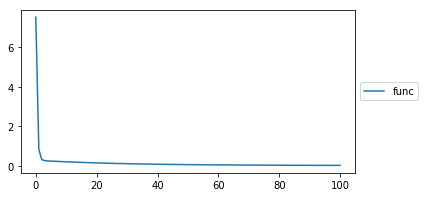

In [29]:
w=np.ones((11,1))

w = np.random.randn(np.shape(x)[1]+1,1)
weight_history = gradient_descent(g = least_squares,alpha = 0.001,max_its = 100,w = w)
MSE(weight_history,least_squares,100)